In [21]:
#importing the required libraries
import sys
import numpy as np
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [22]:
#Importing the MNIST data set
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [23]:
#Splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
import tensorflow as tf

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Test shape: (10000, 784)
Train shape: (55000, 784)
5000 samples of the training set are allocated for validation
Epoch 0, training accuracy 0.09
Epoch 100, training accuracy 0.05
Epoch 200, training accuracy 0.11
Epoch 300, training accuracy 0.15
Epoch 400, training accuracy 0.3
Epoch 500, training accuracy 0.27
Epoch 600, training accuracy 0.37
Epoch 700, training accuracy 0.34
Epoch 800, training accuracy 0.42
Epoch 900, training accuracy 0.45
Epoch 1000, training accuracy 0.57
Epoch 1100, training accuracy 0.56
Epoch 1200, training accuracy 0.6

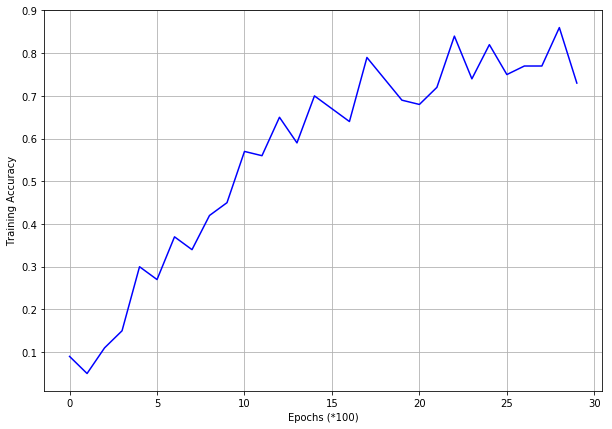

In [1]:
# Parameters
learning_rate = 0.01
training_epochs = 3000
batch_size = 100
display_step = 1

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

def RBFEuclidean(x, C):
    """Computes distance from cluster centers defined in input C
    
    Both outdim and indim should be integers.
    """
    return -tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(tf.expand_dims(x,2),
                                                   tf.expand_dims(C,0))),1))

sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
train_acc = []

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.add(RBFEuclidean(h_fc1_drop, W_fc2), b_fc2)

# Cross entropy loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
# On this case we choose the GradientDescentOptimizer
train_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
# Test model
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())
for i in range(training_epochs):
  batch = mnist.train.next_batch(batch_size)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("\rEpoch %d, training accuracy %g"%(i, train_accuracy))
    train_acc.append(train_accuracy)
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

In [35]:
y_pred = prediction.eval(feed_dict={x: X_test,  keep_prob: 1.0})

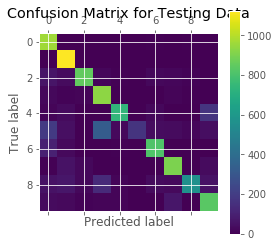

In [37]:
test_conf_mat = confusion_matrix(y_test,y_pred)
plt.matshow(test_conf_mat)
plt.title('Confusion Matrix for Testing Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

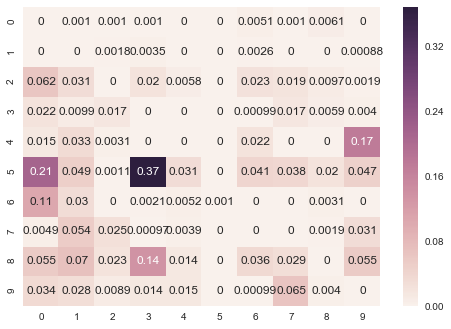

In [39]:
import seaborn as sns
row_sums = test_conf_mat.sum(axis=1, keepdims=True)
norm_conf_mx = test_conf_mat / row_sums
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)
plt.show()